# Симметрия двоичной последовательности. Лабораторная работа №2.

### Задача:
Дана двоичная последовательность из n символов, k из которых - единицы. Если эту последовательность зациклить и представить в виде окружности, то у нее получится одна, несколько или ни одной оси симметрии. Множество последовательностей, полученной из исходной циклическим сдвигом относят к одному классу эквивалентности. 

Необходимо найти количество классов эквивалентности и количество осей симметрии в каждом классе для заданных значений n и k.

In [12]:
from__furure__ import print_function
from math import factorial 
import numpy as np
from numpy import pi as PI
from matplotlib import pyplot as plt

SyntaxError: invalid syntax (<ipython-input-12-1ab027b9d9d9>, line 1)

### Построение последовательности

#### Создание начальной последовательности
n - количество цифр        
k - количество единиц

In [ ]:
def create_sequence(n, k):
    arr1 = [1] * k
    arr2 = [0] * (n-k)

    return arr1 + arr2

#### Циклический сдвиг последовательности вправо
sh - величина сдвига     
sequence - исходная последовательность

In [13]:
def right_rotate(sequence: list, sh):
    lenght = len(sequence)
    sh = sh % lenght
    new_seq = [0] * lenght
    for i in range(lenght):
        new_seq[(i+sh) % lenght] = sequence[i]
    return new_seq

### Генерация последовательностей
#### Проверка двух последовательностей на принадлежность одному классу эквивалентности
seq1 - последовательность 1     
seq2 - последовательность 2        

In [14]:
def is_same_sequences(seq1: list, seq2: list):
    if (len(seq1) != len(seq2)):
        return False
    for i in range(len(seq1)):
        if (seq2 == right_rotate(seq1,i)):
            return True;
    return False

#### Всевозможные перестановки списка
arr - список чисел, перестановки которого будут формироваться

In [15]:
def permutations(arr):
    permutat = []
    length = len(arr)
    for x in range(factorial(length)):
        avaliable = list(arr)
        new_permutation = []
        for radix in range(length, 0, -1):
            place = factorial(radix - 1)
            index = x // place
            new_permutation.append(avaliable.pop(index))
            x -= index * place
        permutat.append(new_permutation)
    return permutat

#### Поиск классов эквивалентности для заданных n и k
n - длина последовательности          
k - количество единиц в последовательности

In [16]:
def find_combinations(n, k):
    combinations = []
    sequence = create_sequence(n, k)
    for comb in permutations(sequence):
        if comb not in combinations:
            combinations.append(comb)
        for i in range(len(combinations)-1):
            if (is_same_sequences(comb,combinations[i]) == True):
                combinations.remove(comb)
                break
    return combinations

### Оси симметрии 

Мы будем использовать обозначения:
* 'nodes' - ось симметрии проходит через узлы на окружности (количество узлов четно)
* 'middles' - ось симметрии проходит между узлами окружности (количество узлов четно)
* 'node&middle' - ось симметрии пересекает один узел (количество узлов нечетно)

.

храниться эти значения будут в словаре, где ключ - обозначение, а значение - индекс "родительской" последовательности:        
dict = { 'nodes': [node, ...], 'middles': [node1, ...], 'node&middle': [node2, ..] }    

здесь:
* node - точка, через которую проходит ось
* node1 - точка, между которой и следующей за ней точкой проходит ось, непересекающая никакие точки
* node2 - точка, между которой и следующей за ней точкой проходит ось, пересекающая далее противоположную точку

#### Поиск всех осей симметрии 
arr - двоичная последовательность

Идея: пусть L - длина массива. Исходный массив сдвигаем постепенно на 1 вправо (L div 2) - 1 раз. Для каждого такого представления исходного массива проделываем следующее: проверяем является ли массив палиндромом (если L четно - случай 2:'middles', иначе - случай 3: 'node&middle'), а если дополнительно L - четное число , то проверяем, является ли срез массива arr[0:L-1] палиндромом (случай 1:'nodes')

In [17]:
def find_symmetry_axis(arr):
    axes = {'nodes':[],'middles':[],'node&middle':[]}
    length = len(arr)
    middle = length // 2
    curr_index = 0
    if length % 2 == 0:
        for _ in range(middle):
            if arr[0 : middle] == arr[length - 1 : middle - 1 : -1]:
                axes['middles'] += [(middle - 1 + curr_index)%length]
            if arr[0 : middle - 1] == arr[length - 2 : middle - 1 : -1]:
                axes['nodes'] += [(middle - 1 + curr_index)%length]
            curr_index -= 1
            arr = right_rotate(arr,1)
                
    else:
        for _ in range(length):
            if arr[0 : middle] == arr[length - 1 : middle : -1]:
                axes['node&middle'] += [(length - 1 + curr_index)%length]
            
            curr_index -= 1
            arr = right_rotate(arr,1)
        
    return axes

#### Изображение последовательности в виде окружности с осями симметрии
sequence - бинарная последовательность

In [18]:
def draw_sequence(sequence):
    # для данной последовательности находим оси симметрии
    axis = find_symmetry_axis(sequence)
    
    length = len(sequence)
    
    # рисуем окружность 
    R = 1
    alpha = np.arange(0, 2 * PI, 0.01)
    plt.plot(R * np.sin(alpha), R * np.cos(alpha), color = "k", linewidth = 1.5)
    plt.title(str(sequence))
    
    # массивы точек, равномерно расположенных на окружности
    x = []
    y = []
    degree_step = 2 * PI / length
    for i in range(length):
        x.append(np.sin(i * degree_step))
        y.append(np.cos(i * degree_step))
                     
        # подпишем точки
        plt.text(x[i],y[i] + 0.07, sequence[i])
        if sequence[i] == 0:
            plt.scatter(x[i],y[i],s = 80, color = "magenta")
        else:
            plt.scatter(x[i],y[i],s = 80, color = "blue")
            
    # линия симметрии
    for key in axis:
        for val in axis[key]:
            if key == 'nodes':
                plt.plot([x[val], x[(val + length // 2) % length]],
                         [y[val], y[(val + length // 2) % length]],
                         color="green", linewidth=1.5)
            elif key == 'middles':
                plt.plot([np.sin((val + 0.5) * degree_step), 
                          np.sin((val + length // 2 + 0.5) * degree_step)],
                         [np.cos((val + 0.5) * degree_step), 
                          np.cos((val + length // 2 + 0.5) * degree_step)],
                         color="green", linewidth=1.5)
            elif key == 'node&middle':
                plt.plot([np.sin((val + 0.5) * degree_step), x[(val + length // 2 + 1) % length]],
                         [np.cos((val + 0.5) * degree_step), y[(val + length // 2 + 1) % length]],
                         color="green", linewidth=1.5)
    plt.show();
    

### Представление результатов
#### Изображение всех классов эквивалентности с осями симметрии для произвольных значений n и k

Длина последовательности:6
Количество единиц:4


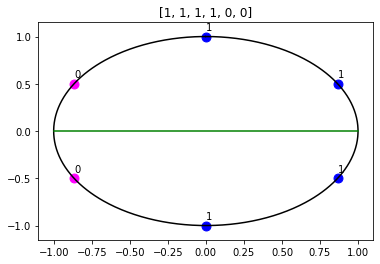

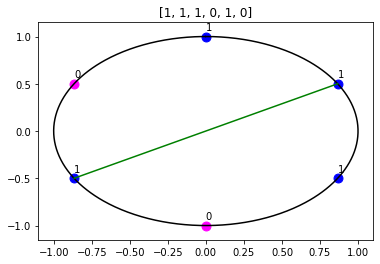

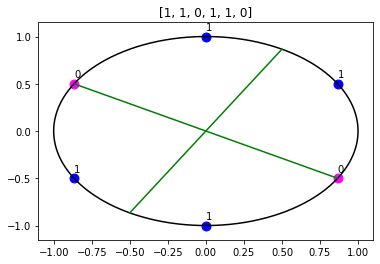

In [19]:
def imagin_equival_classes():
    n=int(input("Длина последовательности:"))
    k=int(input("Количество единиц:"))
    combinations = find_combinations(n,k)
    for sequence in combinations:
        draw_sequence(sequence)
        
        
    
imagin_equival_classes()

#### Преобразование в строку информации, храняцейся в axis в вид: 1(0)11(0)1 или вид 101|101 или вид 10(1)01


In [22]:
def print_seq_axis(sequence, axis):
    length = len(sequence)
    for key in axis:
        for val in axis[key]:
            if key == 'nodes':
                val2 = (val + length // 2) % length
                if (val > val2):
                    tmp = val
                    val = val2
                    val2 = tmp
                
                for i in range (0, val):
                    print(sequence[i],end = "")
                print("(" + str(sequence[val]) + ")",end = "")
                for i in range (val + 1, val2):
                    print(sequence[i],end = "")
                print("(" + str(sequence[val2]) + ")",end = "")
                for i in range (val2 + 1, length):
                    print(sequence[i],end = "")
                    
            elif key == 'middles':
                
                for i in range (val + 1):
                    print(sequence[i],end = "")
                print("|"),
                for i in range (val + 1, length):
                    print(sequence[i],end = "")
                
            elif key == 'node&middle':
                
                val2 = (val + length // 2 + 1) % length
                first = min(val,val2)
                second = max(val,val2)
                
                for i in range(first):
                    print(sequence[i],end = "")
                if val < val2:
                    print("|",end = "")
                else:
                    print("(" + str(sequence[first]) + ")",end = "")
                    first += 1
                    
                for i in range(first, second + 1):
                    print(sequence[i],end = "")
                if val < val2:
                    print("(" + str(sequence[second]) + ")",end = "")
                else:
                    print("|",end = "")
                    
                for i in range(second + 1,length):
                    print(sequence[i],end = "")
                    
            print()
               

#### Вычисление количества классов эквивалентности и количества их осей симметрии для n = 3,...,10 и k = 0,...,n



In [23]:
for n in range(3, 10):
    for k in range(0, n): 
        
        print(f'n={n}, k={k}')
        combinations = find_combinations(n,k)
        
        for sequence in combinations:
            axis = find_symmetry_axis(sequence)
            print_seq_axis(sequence, axis)
            print()

n=3, k=0
0(0)0|
(0)0|0
|000(0)

n=3, k=1
(1)0|0

n=3, k=2
|110(0)

n=4, k=0
0(0)0(0)
(0)0(0)0
00|
00
0|
000

n=4, k=1
(1)0(0)0

n=4, k=2
1|
100

1(0)1(0)
(1)0(1)0

n=4, k=3
1(1)1(0)

n=5, k=0
00(0)00|
0(0)00|0
(0)00|00
0|0000(0)
|0000(0)0

n=5, k=1
(1)00|00

n=5, k=2
|1100(0)0

1(0)10|0

n=5, k=3
1(1)10|0

|1101(1)0

n=5, k=4
1|1110(0)

n=6, k=0
00(0)00(0)
0(0)00(0)0
(0)00(0)00
000|
000
00|
0000
0|
00000

n=6, k=1
(1)00(0)00

n=6, k=2
1|
10000

1(0)10(0)0

(1)00(1)00
10|
0100

n=6, k=3
1(1)10(0)0



10(1)01(0)
1(0)10(1)0
(1)01(0)10

n=6, k=4
11|
1100

1(1)10(1)0

11(0)11(0)
1|
10110

n=6, k=5
11(1)11(0)

n=7, k=0
000(0)000|
00(0)000|0
0(0)000|00
(0)000|000
00|00000(0)
0|00000(0)0
|00000(0)00

n=7, k=1
(1)000|000

n=7, k=2
|11000(0)00

1(0)100|00

1|00100(0)0

n=7, k=3
1(1)100|00


|11001(1)00


10(1)010|0

n=7, k=4
1|11100(0)0



11(0)110|0

|11010(0)10

n=7, k=5
11(1)110|0

1|11101(1)0

1(1)101|10

n=7, k=6
11|11110(0)

n=8, k=0
000(0)000(0)
00(0)000(0)0
0(0)000(0)00
(0)000(0)000
0000